<a href="https://colab.research.google.com/github/valeriaskvo/TSA_based_rehabilitation_robot/blob/main/RJ_simulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def plot_results(x, y, x_label = "T", y_label = "X(T)", plot_title = "X=F(T)", labels = [], xlim = None, ylim = None, show = True):
  plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
  plt.grid(True)

  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(plot_title)

  if len(x.shape)==1 and len(x.shape)==len(y.shape):
    plt.plot(x, y, color = 'red', linewidth = 3.0)
  else:
    plt.plot(x, y, linewidth = 3.0)

  if xlim:
    plt.xlim(xlim)
  if ylim:
    plt.ylim(ylim)


  if labels:
    plt.legend(labels)    

  if show:
    plt.show()
  return

In [11]:
def TSA_inverse_kinematics(TSA, x):
  theta = np.sqrt((TSA["L"]**2-(TSA["L"]-x)**2)/TSA["r"]**2)
  return theta

def TSA_jacobian(TSA, x, theta):
  J = theta*TSA["r"]**2/(TSA["L"]-x)
  dx = J*TSA["dtheta"]
  T = TSA["tau"]/J
  return J, dx, T

In [12]:
TSA = {"L": 300/10**3,     # String length [m]
       "r": 0.8/10**3,     # String radius [m]
       "dtheta": 100,      # Motor nominal speed [rad/sec]
       "tau": 0.18,        # Motor nominal torque [N.m]
       }

TSA["X_max"] = 0.2*TSA["L"]
print(TSA)

{'L': 0.3, 'r': 0.0008, 'dtheta': 100, 'tau': 0.18, 'X_max': 0.06}


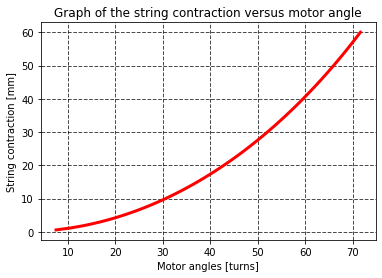

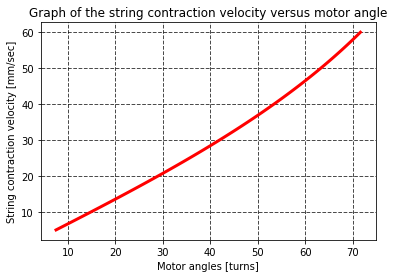

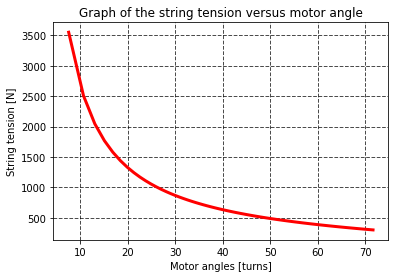

In [13]:
x = np.linspace(0.01*TSA["X_max"], TSA["X_max"], 100)
theta = TSA_inverse_kinematics(TSA, x)
J, dx, T = TSA_jacobian(TSA, x, theta)

motor_angle = theta/np.pi
plot_results(motor_angle, x*10**3, x_label="Motor angles [turns]", y_label="String contraction [mm]", plot_title="Graph of the string contraction versus motor angle")
plot_results(motor_angle, dx*10**3, x_label="Motor angles [turns]", y_label="String contraction velocity [mm/sec]", plot_title="Graph of the string contraction velocity versus motor angle")
plot_results(motor_angle, T, x_label="Motor angles [turns]", y_label="String tension [N]", plot_title="Graph of the string tension versus motor angle")

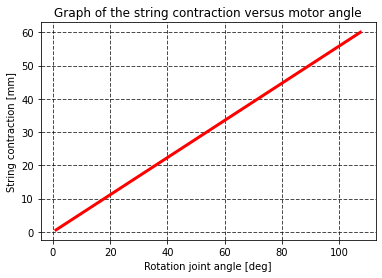

107.42958658702935


In [14]:
RJ = {"R": 32 * 10**(-3)}

alpha = x/RJ["R"]

dalpha = dx/RJ["R"]
tau_RJ = T*RJ["R"]

plot_results(np.rad2deg(alpha), x*10**3, x_label="Rotation joint angle [deg]", y_label="String contraction [mm]", plot_title="Graph of the string contraction versus motor angle")
print(np.max(np.rad2deg(alpha)))

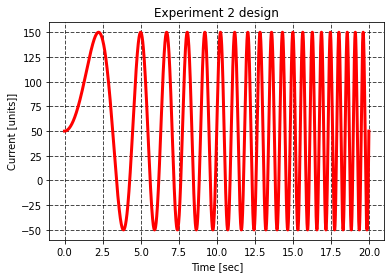

Final frequency: 1.0 Hz


In [15]:
def frequency_f(t, dw, w):
    return (dw * t + w)/(2*np.pi)

def chirp_x(t, A,  dw, w, x0 = 0):
    return A * np.sin(dw * t**2/2 + w * t) + x0

def chirp(t, A, w0, wf, tf):
    k = (wf - w0) / tf
    w = 0.5 * k*t + w0
    return A * np.sin(w * t * 2*np.pi) + A/2, w

A = 100
w0 = 0
wf = 2
tf = 20

k = (wf - w0) / tf

n = 10000
t = np.linspace(0, tf, n)

I, w = chirp(t, A, w0, wf, tf)
plot_results(t, I, x_label="Time [sec]", y_label="Current [units]]", plot_title="Experiment 2 design")

print("Final frequency:",w[-1],"Hz")

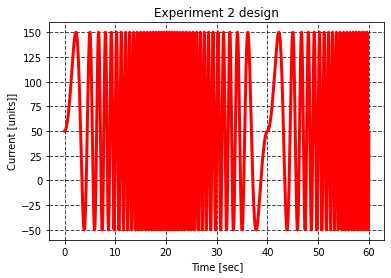

In [16]:
t_new = np.linspace(0, 3*tf, n*3)
I_new = np.zeros(t_new.shape)

i = 0
t0 = 0
t_i = 0
j = 0
t = 0
while t<3*tf:
    if t_i>tf:
        i+=1
        t0 = t

    t = t_new[j]
    t_i = t - t0

    if i%2==0:
        I_new[j], w = chirp(t_i, A, w0, wf, tf)
    else:
        I_new[j], w = chirp(t_i, A, wf, w0, tf)

    j+=1

plot_results(t_new, I_new, x_label="Time [sec]", y_label="Current [units]]", plot_title="Experiment 2 design")

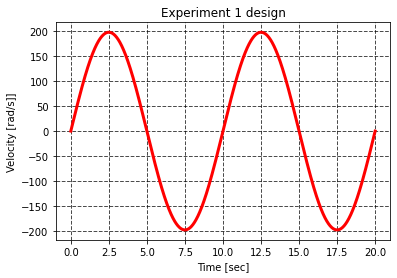

In [19]:
A = 50 *2*np.pi
w = 0.1 *2*np.pi
tf = 20

t = np.linspace(0,tf,1000)
traj = A*np.sin(t*w)*w

plot_results(t, traj, x_label="Time [sec]", y_label="Velocity [rad/s]]", plot_title="Experiment 1 design")


def w_desired(t, w0, wf, tf):
    k = (wf - w0) / tf
    w = k*t + w0
    return w


def chirp(t, A, w0, wf, tf, x0):
    k = (wf - w0) / tf
    return A * np.sin((0.5 * k * t**2 + w0) * 2*np.pi) + x0

In [23]:
print(0.5**0.5)


[[5.00500501]
 [5.02502503]
 [5.04504505]
 [5.06506507]
 [5.08508509]
 [5.10510511]
 [5.12512513]
 [5.14514515]
 [5.16516517]
 [5.18518519]
 [5.20520521]
 [5.22522523]
 [5.24524525]
 [5.26526527]
 [5.28528529]
 [5.30530531]
 [5.32532533]
 [5.34534535]
 [5.36536537]
 [5.38538539]
 [5.40540541]
 [5.42542543]
 [5.44544545]
 [5.46546547]
 [5.48548549]
 [5.50550551]
 [5.52552553]
 [5.54554555]
 [5.56556557]
 [5.58558559]
 [5.60560561]
 [5.62562563]
 [5.64564565]
 [5.66566567]
 [5.68568569]
 [5.70570571]
 [5.72572573]
 [5.74574575]
 [5.76576577]
 [5.78578579]
 [5.80580581]
 [5.82582583]
 [5.84584585]
 [5.86586587]
 [5.88588589]
 [5.90590591]
 [5.92592593]
 [5.94594595]
 [5.96596597]
 [5.98598599]
 [6.00600601]
 [6.02602603]
 [6.04604605]
 [6.06606607]
 [6.08608609]
 [6.10610611]
 [6.12612613]
 [6.14614615]
 [6.16616617]
 [6.18618619]
 [6.20620621]
 [6.22622623]
 [6.24624625]
 [6.26626627]
 [6.28628629]
 [6.30630631]
 [6.32632633]
 [6.34634635]
 [6.36636637]
 [6.38638639]
 [6.40640641]
 [6.42